In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import date 

# listings

In [2]:
listings = pd.read_csv('/Users/galvanize/Desktop/cap4_airbnb/data/listings.csv', sep=',')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,38585,https://www.airbnb.com/rooms/38585,20191128073742,2019-11-28,Charming Victorian home - twin beds + breakfast,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none,Our North Asheville neighborhood stretches alo...,I can lend you a yoga mat or you can go to our...,"You need a car, but UBER and Lyft are availabl...",Safe parking in our driveway. You also have fu...,"I love entertaining, enjoy chatting with guest...",This list is based on previous experiences: * ...,NaN,NaN,https://a0.muscache.com/im/pictures/216165/755...,NaN,165529,https://www.airbnb.com/users/show/165529,Evelyne,2010-07-13,"Asheville, North Carolina, United States","(Hidden by Airbnb) Likes:\r\nDancing, Horse Ri...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/165529/profil...,https://a0.muscache.com/im/users/165529/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Asheville, NC, United States",NaN,28804,NaN,Asheville,NC,28804.0,North Carolina Mountains,"Asheville, NC",US,United States,35.65146,-82.62792,t,House,Private room,2,1.0,1,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",NaN,$55.00,NaN,NaN,$150.00,$0.00,1,$15.00,2,3,2,2,3,3,2.0,3.0,3 days ago,t,24,45,64,64,2019-11-28,137,16,2010-10-28,2019-11-11,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""NORTH CAROLINA"","" BUNCOMBE""}",f,f,moderate,t,t,1,0,1,0,1.24
1,80905,https://www.airbnb.com/rooms/80905,20191128073742,2019-11-28,French Chic Loft,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none,"Quiet, tucked away from the hustle and bustle ...",there is Apple TV not cable TV (there is no op...,Park your car and walk anywhere and everywhere...,NaN,I am easily accessible and available if you ne...,THE GUEST WHO BOOKS AGREES TO: • Be present at...,NaN,NaN,https://a0.muscache.com/im/pictures/29807425/6...,NaN,427027,https://www.airbnb.com/users/show/427027,Celeste,2011-03-07,"Asheville, North Carolina, United States",Locally-owned and operated Asheville Stay offe...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/e7351.

### code to reset numbers of columns displaced
### pd.set_option('display.max_columns', None) in the first cell with imports

In [3]:
for col in listings.columns:
    print(col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [ ]:
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type

### This graph shows the number of hosts that maximizes the Airbnb services. 

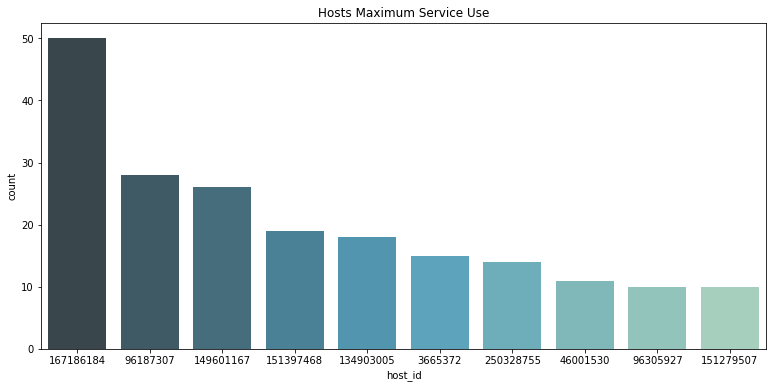

In [4]:
plt.figure(1, figsize=(13, 6))
plt.title("Hosts Maximum Service Use")
sns.countplot(x = "host_id", order=listings['host_id'].value_counts().index[0:10] ,data=listings,palette='GnBu_d');

### id 	room_type 	price 	minimum_nights 	availability_365 	calculated_host_listings_count

In [36]:
pt = listings[['property_type', 'room_type', 'price', 'minimum_nights', 'availability_365']]
pt

,property_type,room_type,price,minimum_nights,availability_365
0,House,Private room,$55.00,2,64
1,Loft,Entire home/apt,$765.00,1,347
2,Apartment,Entire home/apt,$75.00,30,210
3,Guesthouse,Entire home/apt,$107.00,1,347
4,House,Private room,$71.00,1,345
...,...,...,...,...,...
2436,House,Entire home/apt,$78.00,2,347
2437,Apartment,Private room,$58.00,2,355
2438,Bed and breakfast,Private room,$175.00,1,329
2439,Bed and breakfast,Private room,$195.00,1,343


In [6]:
# Histograms below
numeric_vars = ['price', 'minimum_nights', 'availability_365']
categorical_vars = ['room_type']

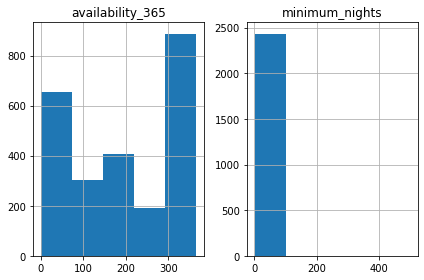

In [7]:
# Histograms
ax = listings[numeric_vars].hist(bins=5)
plt.tight_layout()

In [8]:
listings['price']

0        $55.00
1       $765.00
2        $75.00
3       $107.00
4        $71.00
         ...   
2436     $78.00
2437     $58.00
2438    $175.00
2439    $195.00
2440    $175.00
Name: price, Length: 2441, dtype: object

In [37]:
type(listings['price'])

pandas.core.series.Series

In [38]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 5 columns):
property_type       2441 non-null object
room_type           2441 non-null object
price               2441 non-null object
minimum_nights      2441 non-null int64
availability_365    2441 non-null int64
dtypes: int64(2), object(3)
memory usage: 95.5+ KB


In [10]:
listings['availability_30']

0       24
1       24
2        0
3       16
4       24
        ..
2436    20
2437    24
2438    12
2439    13
2440    15
Name: availability_30, Length: 2441, dtype: int64

In [9]:
listings['square_feet']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2436   NaN
2437   NaN
2438   NaN
2439   NaN
2440   NaN
Name: square_feet, Length: 2441, dtype: float64

# listing_2

In [11]:
listings_2 = pd.read_csv('/Users/galvanize/Desktop/cap4_airbnb/data/listings_2.csv', sep=',')
listings_2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345


In [12]:
for col in listings_2.columns:
    print(col)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [13]:
listings_2['neighbourhood_group']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2436   NaN
2437   NaN
2438   NaN
2439   NaN
2440   NaN
Name: neighbourhood_group, Length: 2441, dtype: float64

In [14]:
listings_2['room_type']

0          Private room
1       Entire home/apt
2       Entire home/apt
3       Entire home/apt
4          Private room
             ...       
2436    Entire home/apt
2437       Private room
2438       Private room
2439       Private room
2440       Private room
Name: room_type, Length: 2441, dtype: object

In [15]:
listings_2['price']

0        55
1       765
2        75
3       107
4        71
       ... 
2436     78
2437     58
2438    175
2439    195
2440    175
Name: price, Length: 2441, dtype: int64

# room_type

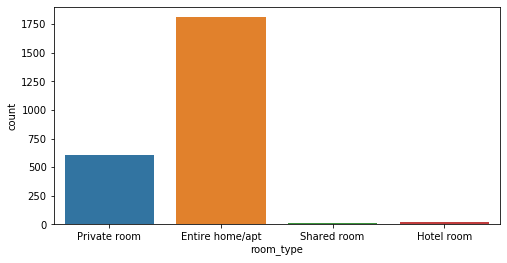

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'room_type', data = listings_2);

In [43]:
listings_2['price'].value_counts()

75      94
150     90
125     85
100     81
99      64
        ..
1250     1
1100     1
1000     1
910      1
0        1
Name: price, Length: 302, dtype: int64

(0, 1200)

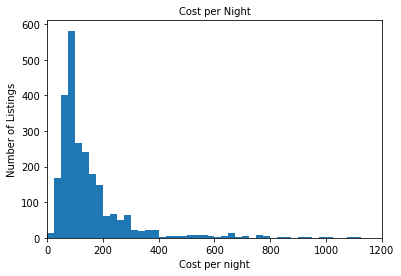

In [17]:
x =plt.hist(listings_2['price'],bins= 400)
plt.xlabel('Cost per night')
plt.ylabel('Number of Listings')
plt.title('Cost per Night', fontsize=10)
plt.xlim(0,1200)    # set the ylim to ymin, ymax

### Price based on availability and location on a map.

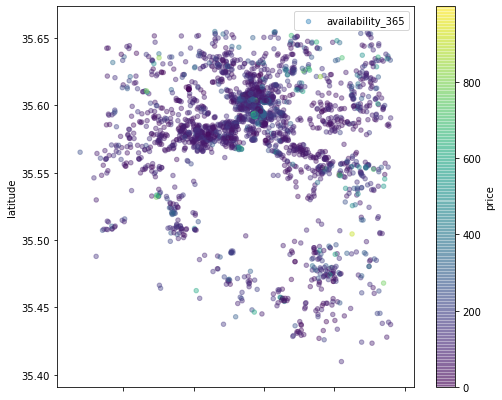

In [18]:
lalg=listings_2[listings_2.price<1000]
plot=lalg.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap(), colorbar=True, alpha=0.4, figsize=(8,7))

### Listings_2  |  Price by neighbourhood

In [19]:
listings_2['neighbourhood'].value_counts()

28806    695
28801    595
28803    338
28804    301
28805    271
28704    142
28715     50
28732     49
Name: neighbourhood, dtype: int64

## Zip 28732, Fletcher, NC had the highest average price.
#### Woodfin, NC  28804
#### Asheville, NC  28801, 28803, 28805, 28806
#### Arden, NC  28704
#### Biltmore Lake, NC |28715

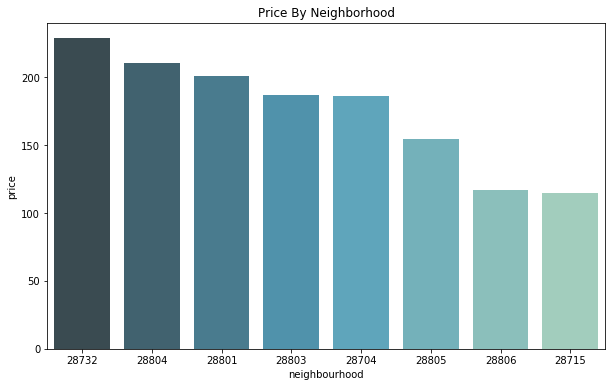

In [20]:
avg6=listings_2.groupby(['neighbourhood'])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)
avg6

plt.figure(figsize=(10,6))
plt.title("Price By Neighborhood")
sns.barplot(x=avg6.neighbourhood, y=avg6.price, order=avg6.neighbourhood, palette='GnBu_d');

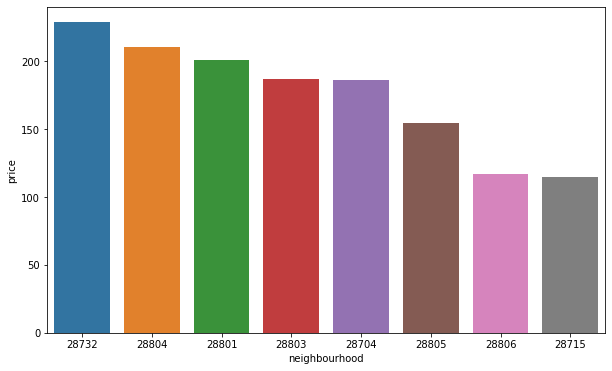

In [21]:
avg6=listings_2.groupby(['neighbourhood'])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)
avg6

plt.figure(figsize=(10,6))
sns.barplot(x=avg6.neighbourhood, y=avg6.price, order=avg6.neighbourhood);

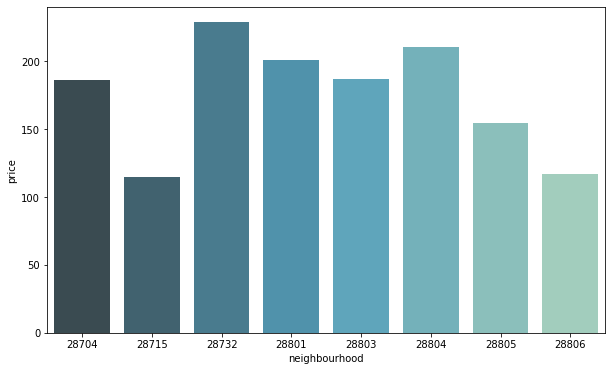

In [22]:
avg_=listings_2.groupby('neighbourhood',as_index=False)['price'].mean().sort_values('neighbourhood', ascending=True)
plt.figure(figsize=(10,6))

sns.barplot(avg_['neighbourhood'], avg_['price'], palette='GnBu_d');

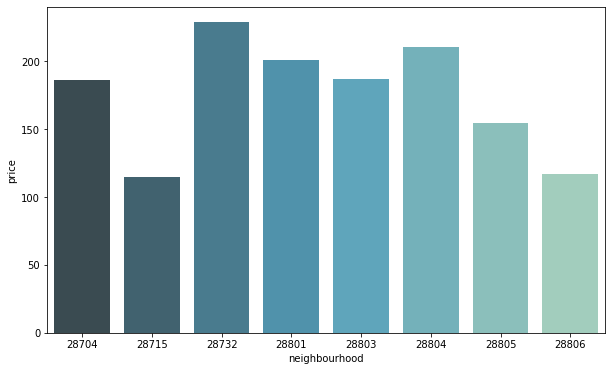

In [23]:
avg_=listings_2.groupby('neighbourhood',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_['neighbourhood'], avg_['price'], palette='GnBu_d');

# calendar

In [24]:
calendar = pd.read_csv('/Users/galvanize/Desktop/cap4_airbnb/data/calendar.csv', sep=',')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2283071,2019-11-28,f,$38.00,$38.00,1,1125
1,2283071,2019-11-29,f,$38.00,$38.00,1,1125
2,2283071,2019-11-30,f,$38.00,$38.00,1,1125
3,2283071,2019-12-01,f,$38.00,$38.00,1,1125
4,2283071,2019-12-02,f,$38.00,$38.00,1,1125


In [25]:
calendar.shape

(890965, 7)

In [46]:
adjusted_price['adjusted_price']

NameError: name 'adjusted_price' is not defined

# neighbourboods

In [26]:
neighbourhoods = pd.read_csv('/Users/galvanize/Desktop/cap4_airbnb/data/neighbourhoods.csv', sep=',')
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,28704
1,NaN,28715
2,NaN,28732
3,NaN,28801
4,NaN,28803


# reviews

In [27]:
reviews = pd.read_csv('/Users/galvanize/Desktop/cap4_airbnb/data/reviews.csv', sep=',')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,38585,129120,2010-10-28,55877,Ritchie,Evelyne is an accommodating host who lives in ...
1,38585,147273,2010-11-30,279973,Cathy,Evelyne was very welcoming to her home; my fri...
2,38585,198797,2011-03-14,411638,NaN,I really enjoyed Evelyne's welcoming and bubbl...
3,38585,201932,2011-03-17,441855,Bill,Very gracious host and was helpful in all aspe...
4,38585,341616,2011-06-28,657560,Joakim,Evelyn was very friendly and easy to comunicat...


# reviews_2 
## same two row is in calendar

In [28]:
reviews_2 = pd.read_csv('/Users/galvanize/Desktop/cap4_airbnb/data/reviews_2.csv', sep=',')
reviews_2.head()

,listing_id,date
0,38585,2010-10-28
1,38585,2010-11-30
2,38585,2011-03-14
3,38585,2011-03-17
4,38585,2011-06-28


# linear_model

In [29]:
linear_model = smf.ols(formula='total_paid_first_6_months ~ month_first_order + total_orders_first_6_months', data=customers)
fitted_model = linear_model.fit()
fitted_model.summary()

NameError: name 'customers' is not defined

In [ ]:
df4 = df.groupby(['customer_state']).agg({'payment_value':['sum'] })
df4 = df4.reset_index()
df4.columns = ['customer_state', 'tot_payment_value']
df4 = df4.sort_values('tot_payment_value', ascending = False)

In [ ]:
formula = 'payment_value ~ C(customer_state)'

fitted_model = smf.ols(formula=formula, data=olist_data).fit()
fitted_model.summary()